<a href="https://colab.research.google.com/github/Epsita-R/Speech-Processing-Recognition/blob/main/2348517_ete1_spr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

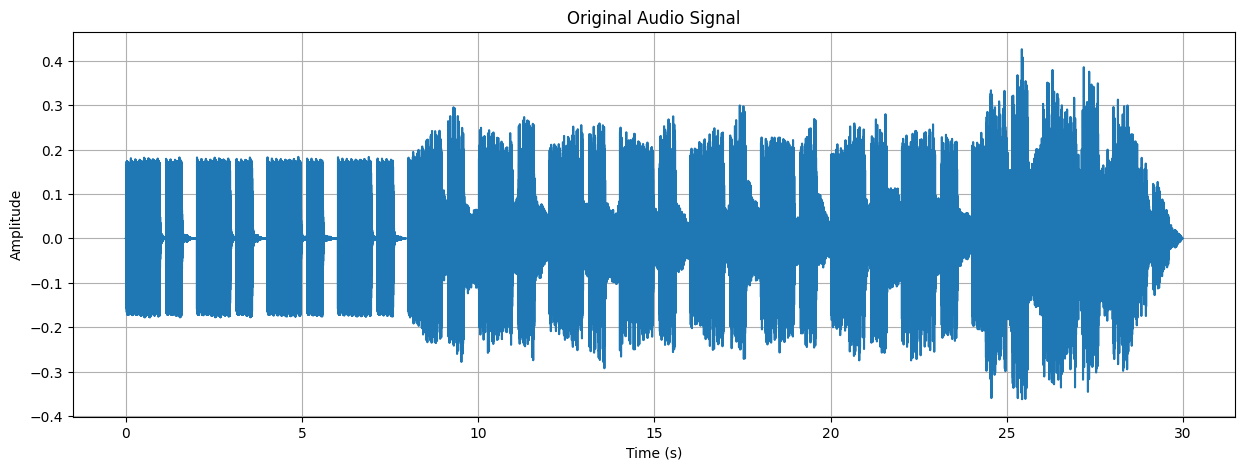

In [ ]:
audio_file = '/content/sample.wav'
signal, sr = librosa.load(audio_file, sr=None)

plt.figure(figsize=(15, 5))
plt.plot(np.linspace(0, len(signal) / sr, len(signal)), signal)
plt.title('Original Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Question 1:

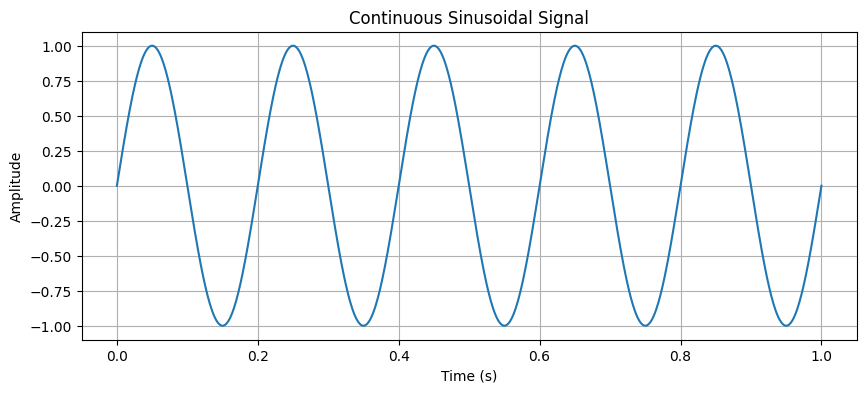

In [ ]:
# Define parameters
amplitude = 1
frequency = 5
duration = 1
time_continuous = np.linspace(0, duration, 1000)

# (a) Continuous sinusoidal signal
continuous_signal = amplitude * np.sin(2 * np.pi * frequency * time_continuous)
plt.figure(figsize=(10, 4))
plt.plot(time_continuous, continuous_signal)
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

This generates a sinusoidal signal with a frequency of 5 Hz, amplitude of 1, and duration of 1 second. The signal is plotted as a continuous curve.

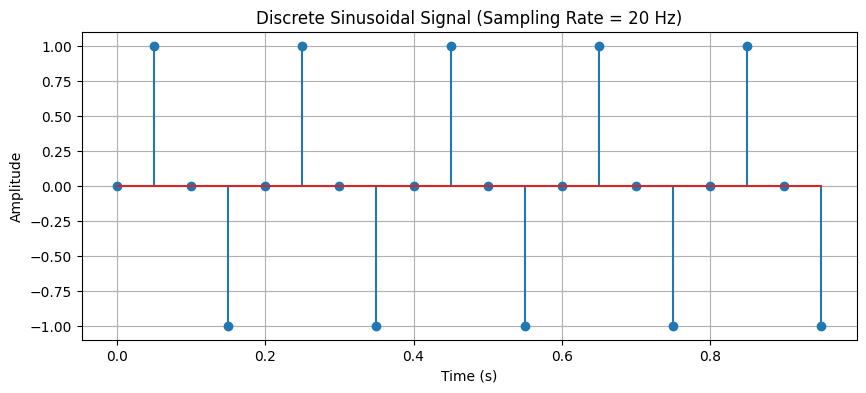

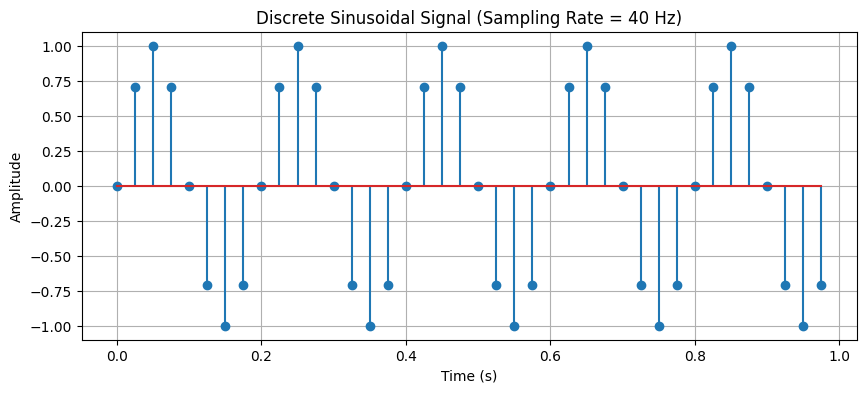

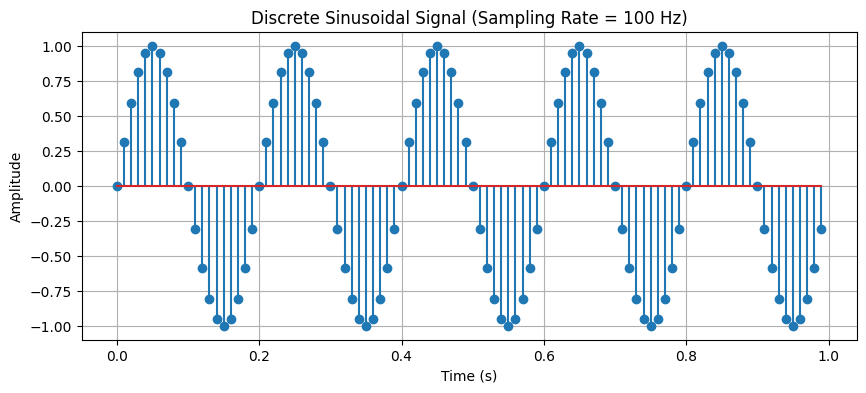

In [ ]:
# (b) Sample the signal at discrete sampling rates
sampling_rates = [20, 40, 100]  # in Hz
for rate in sampling_rates:
    time_discrete = np.arange(0, duration, 1/rate)  # Time array for discrete signal
    discrete_signal = amplitude * np.sin(2 * np.pi * frequency * time_discrete)
    plt.figure(figsize=(10, 4))
    plt.stem(time_discrete, discrete_signal, use_line_collection=True)
    plt.title(f'Discrete Sinusoidal Signal (Sampling Rate = {rate} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

The signal is sampled at different rates (20 Hz, 40 Hz, and 100 Hz). Each sampled version is plotted using a stem plot to show the discrete nature of the sampled points.

Inference:
Higher sampling rates provide a more accurate representation of the continuous signal.
Lower sampling rates will distort the reconstructed signal.


Question 2:

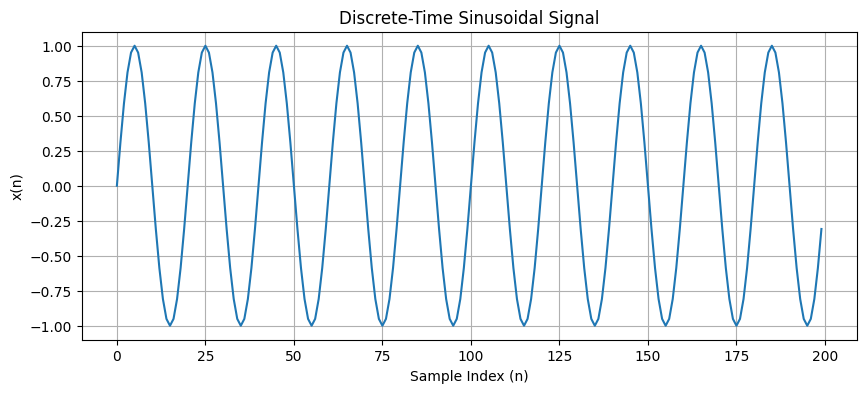

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
fo = 50  # Hz
Fs = 1000  # Hz
N = 200  # Number of samples

# Generate the discrete-time sinusoidal signal
n = np.arange(N)
x = np.sin(2 * np.pi * fo / Fs * n)

# (a) Plot the original discrete-time sinusoidal signal
plt.figure(figsize=(10, 4))
plt.plot(n, x)
plt.xlabel('Sample Index (n)')
plt.ylabel('x(n)')
plt.title('Discrete-Time Sinusoidal Signal')
plt.grid(True)
plt.show()

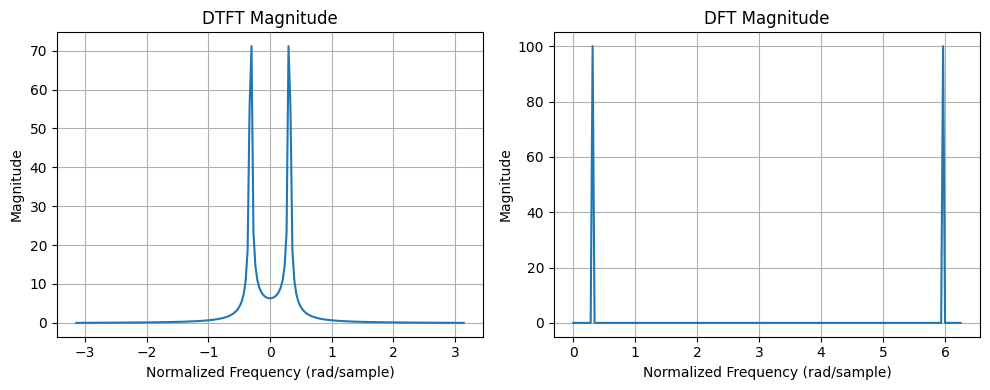

In [ ]:
# (b) Compute the DTFT
def dtft(x):
    N = len(x)
    omega = np.linspace(-np.pi, np.pi, N)
    X = np.zeros(N, dtype=complex)  # Use complex directly
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * omega[k] * n)
    return X, omega

X_dtft, omega_dtft = dtft(x)

# (c) Compute the DFT
X_dft = np.fft.fft(x)
omega_dft = 2 * np.pi * np.arange(N) / N

# (d) Compare DTFT and DFT
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(omega_dtft, np.abs(X_dtft))
plt.xlabel('Normalized Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('DTFT Magnitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(omega_dft, np.abs(X_dft))
plt.xlabel('Normalized Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('DFT Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


Similarities:

- Both DTFT and DFT show the distribution of the signal's energy across different frequencies.

- The magnitude of the output represents the amplitude of the frequency component, while the phase represents the time delay of the component.

Differences:

- DTFT is a continuous-time function of frequency: The DTFT is defined for all frequencies, even those that are not integer multiples of the fundamental frequency.

- The DFT is only defined for frequencies that are integer multiples of the fundamental frequency.

- DFT is computationally more efficient than DTFT.

- DTFT has infinite resolution but DFT has finite resolution. The DFT has a limited frequency resolution, which is determined by the number of samples in the signal.

Question 3:

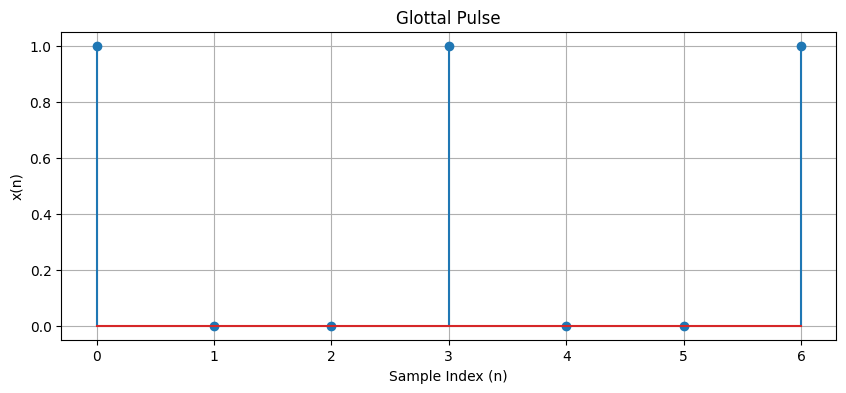

In [ ]:
# (a) Generate the discrete-time source signal (glottal pulse)
x = np.array([1, 0, 0, 1, 0, 0, 1])

# Plot the source signal
plt.figure(figsize=(10, 4))
plt.stem(x)
plt.xlabel('Sample Index (n)')
plt.ylabel('x(n)')
plt.title('Glottal Pulse')
plt.grid(True)
plt.show()

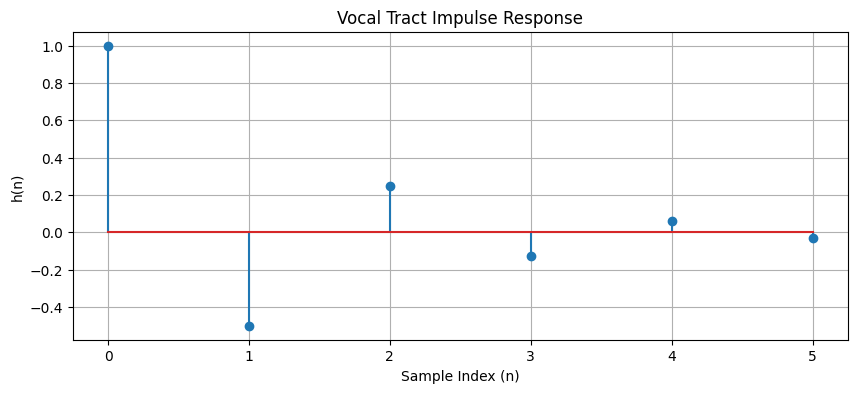

In [ ]:
# (b) Define the vocal tract model (impulse response)
h = np.array([1, -0.5, 0.25, -0.125, 0.0625, -0.03125])

# Plot the impulse response
plt.figure(figsize=(10, 4))
plt.stem(h)
plt.xlabel('Sample Index (n)')
plt.ylabel('h(n)')
plt.title('Vocal Tract Impulse Response')
plt.grid(True)
plt.show()

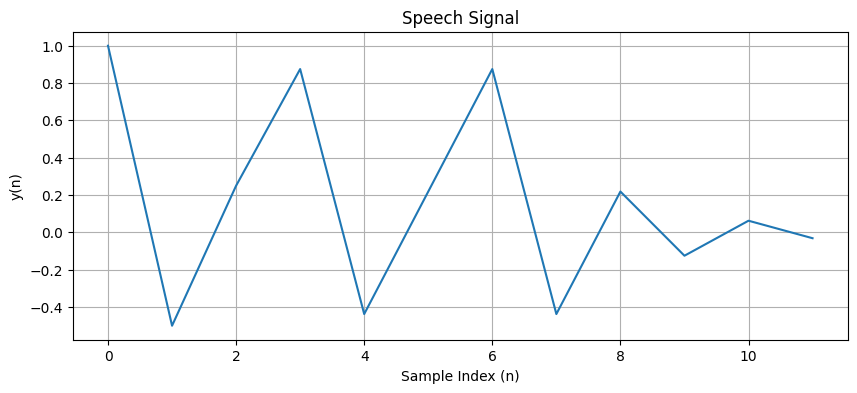

In [ ]:
# (c) Perform linear convolution to generate the speech signal
y = np.convolve(x, h)

# Plot the speech signal
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.xlabel('Sample Index (n)')
plt.ylabel('y(n)')
plt.title('Speech Signal')
plt.grid(True)
plt.show()

The filtering process shapes the source signal by modifying its spectral content. The vocal tract impulse response acts as a filter, attenuating or amplifying certain frequency components of the source signal. This results in the characteristic formants or resonances that give speech its unique quality. The convolution operation effectively applies the filter to the source signal, producing the speech signal.